<a href="https://colab.research.google.com/github/Hjhirp/Digital-Image-Processing-and-Analysis/blob/main/Lab8/19bce079_prac8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import skimage.io
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
import pandas as pd
# from numpy import fft2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def con(i,j,n,m,s):
  i1=i-s//2
  j1=j-s//2
  ft=[]
  if i1>=0 and i1+s<n and j1>=0 and j1+s<m:
    for ii in range(i1,i1+s):
      for jj in range(j1,j1+s):
        ft.append(image1[ii][jj])
  return ft

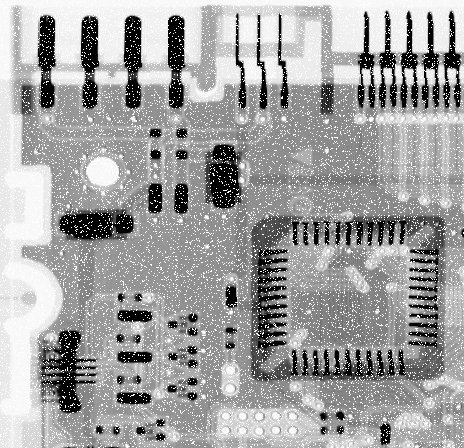

In [ ]:
image1 = skimage.io.imread('/content/drive/MyDrive/DIPA/Images/fig5.08(b).jpg')
cv2_imshow(image1)

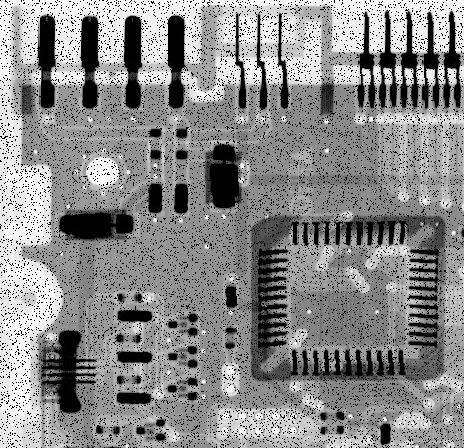

In [ ]:
image2 = skimage.io.imread('/content/drive/MyDrive/DIPA/Images/fig5.08(a).jpg')
cv2_imshow(image2)

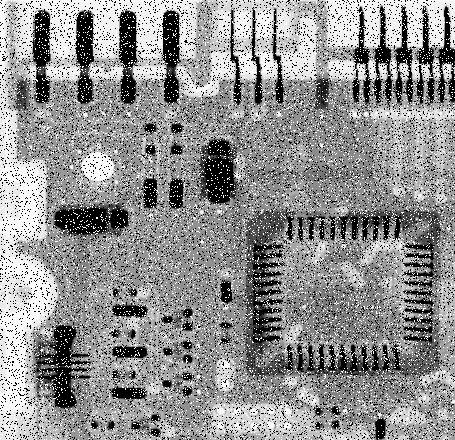

In [ ]:
image3 = skimage.io.imread('/content/drive/MyDrive/DIPA/Images/fig5.10(a).jpg')
cv2_imshow(image3)

# Salt Noise using median

Orginal: 


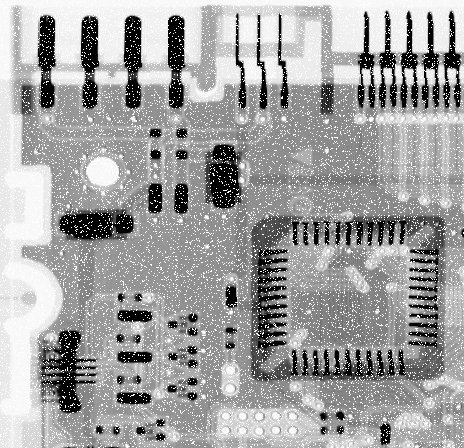

Filtered: 


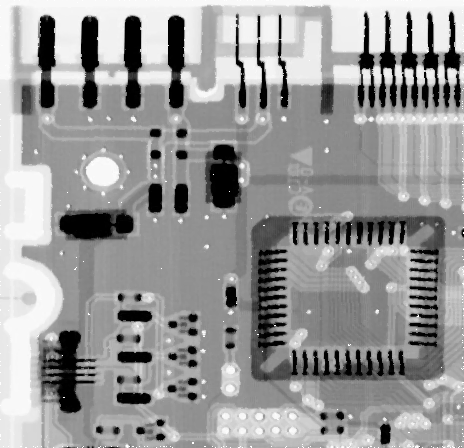

In [ ]:
img=np.copy(image1)
s=3
max=255
for i in range(image1.shape[0]):
  for j in range(image1.shape[1]):
    ft = con(i,j,image1.shape[0],image1.shape[1],s)
      # print(ft)
    if len(ft) !=0:
      med = np.median(ft)
      if(med!=max):
        img[i][j]=med

print('Orginal: ')
cv2_imshow(image1)
print('Filtered: ')
cv2_imshow(np.asarray(img))


# Pepper noise using median

Orginal: 


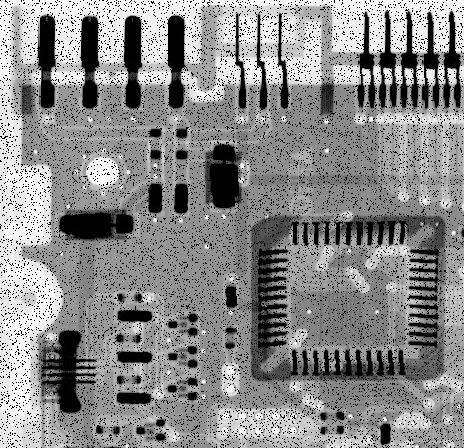

Filtered: 


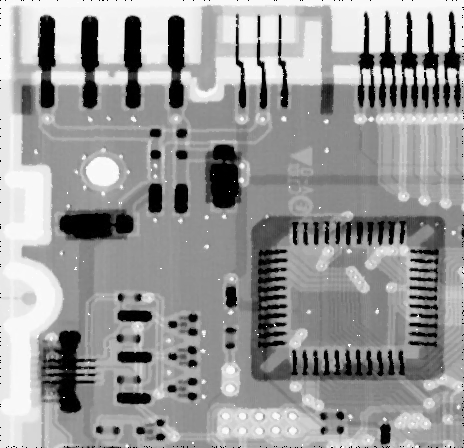

In [ ]:
img=np.copy(image2)
min=0
s=3
for i in range(image2.shape[0]):
  for j in range(image2.shape[1]):
    ft = con(i,j,image2.shape[0],image2.shape[1],s)
      # print(ft)
    if len(ft) !=0:
      med = np.median(ft)
      if(med!=min):
        img[i][j]=med

print('Orginal: ')
cv2_imshow(image2)
print('Filtered: ')
cv2_imshow(np.asarray(img))


# salt and pepper noise

Orginal: 


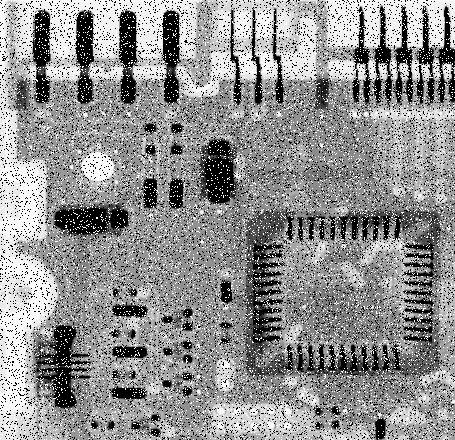

Filtered: 


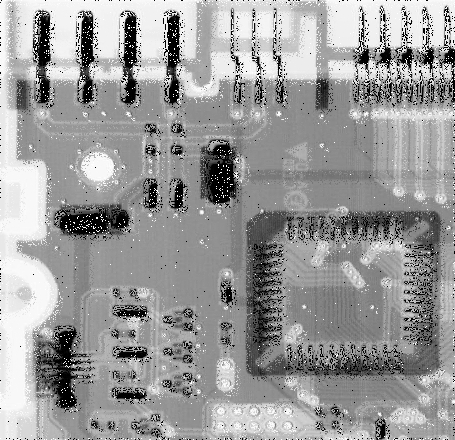

In [ ]:
img=np.copy(image3)
sz=3
min=0
for i in range(image3.shape[0]):
  for j in range(image3.shape[1]):
    ft = con(i,j,image3.shape[0],image3.shape[1],sz)
    # print(ft)
    if len(ft) !=0:
      med = np.median(ft)
      if(med!=min and med!=max and (image3[i][j]==min or image3[i][j]==max)):
        img[i][j]=med

print('Orginal: ')
cv2_imshow(image3)
print('Filtered: ')
cv2_imshow(np.asarray(img))


# Adaptive Medium

Size:  3
Size:  5
Size:  7
Size:  9
Orginal: 


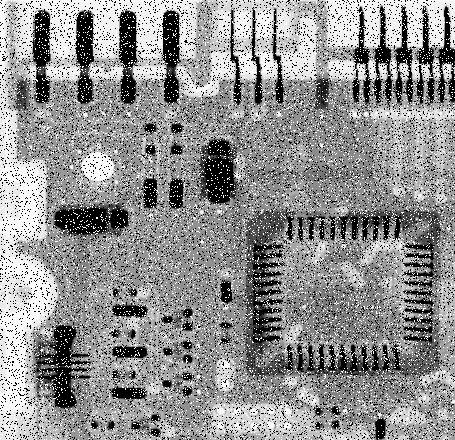

Filtered: 


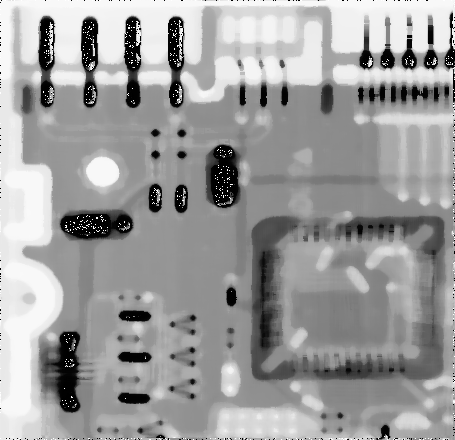

In [ ]:
img=np.copy(image3)
sz=[3,5,7,9]
min=0

for s in sz:
  cnt=0
  for i in range(image3.shape[0]):
    for j in range(image3.shape[1]):
      ft = con(i,j,image3.shape[0],image3.shape[1],s)
      if len(ft) !=0:
        md = np.median(ft)
        if md==min or md==max:
          cnt=+1
        else :
          img[i][j]=md

  print("Size: ",s)
  if cnt==0: break

print('Orginal: ')
cv2_imshow(image3)
print('Filtered: ')
cv2_imshow(np.asarray(img))


# Geometric Mean

Orginal: 


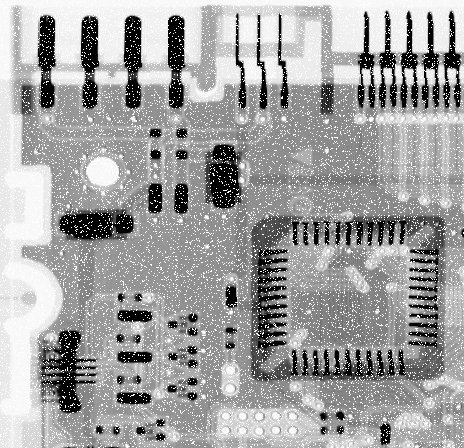

Filtered: 


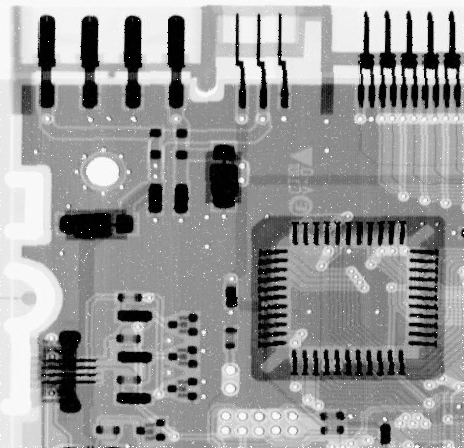

Orginal: 


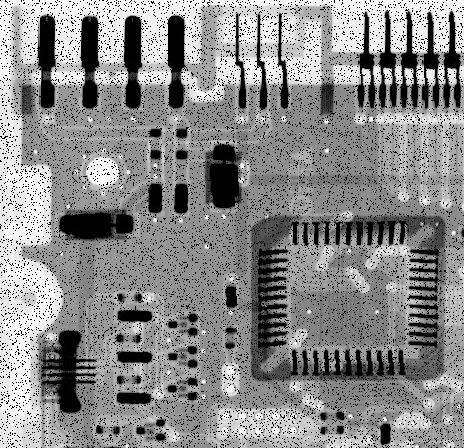

Filtered: 


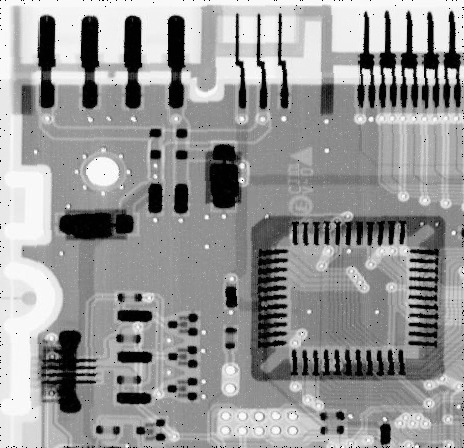

Orginal: 


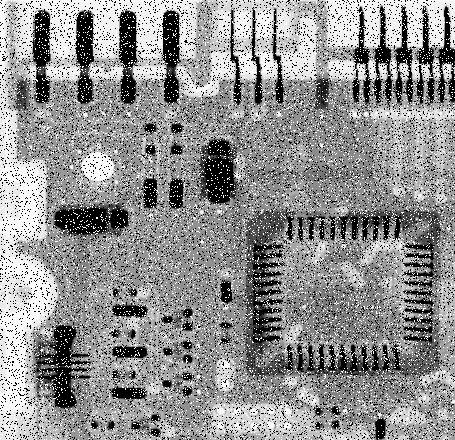

Filtered: 


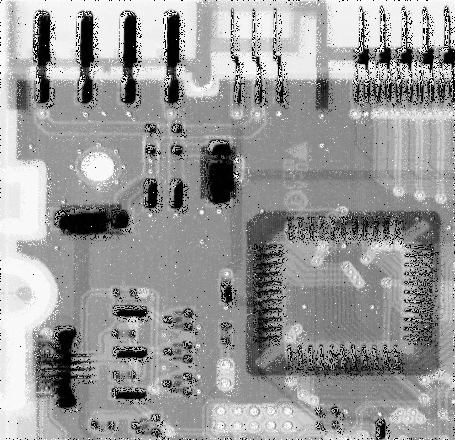

In [ ]:
s=3
i1=1

for im in (image1,image2,image3):
  img=np.copy(im)
  for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        ft = con(i,j,im.shape[0],im.shape[1],s)
        if len(ft) !=0:
          x=1
          for p1 in ft:
            if p1!=0:
              x*=(p1**(1/9))
          if(im[i][j]==min or im[i][j]==max and x!=min and x!=max) :
            img[i][j]=x
  print('Orginal: ')
  cv2_imshow(im)
  print('Filtered: ')
  cv2_imshow(np.asarray(img))

# Harmonic Mean

Orginal: 


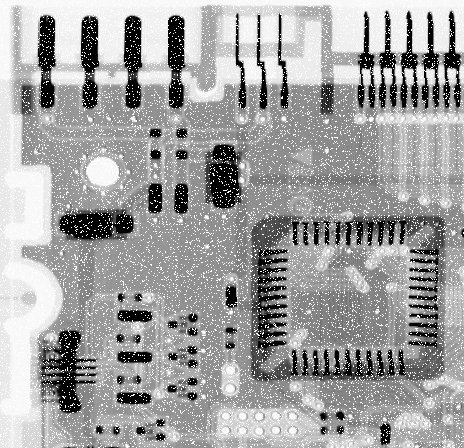

Filtered: 


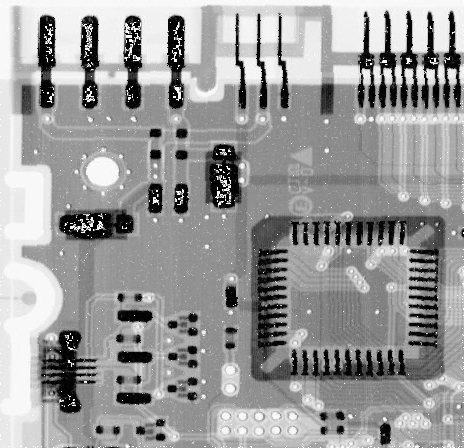

In [ ]:
img=np.copy(image1)
min=0
s=3
for i in range(image1.shape[0]):
  for j in range(image1.shape[1]):
      ft = con(i,j,image1.shape[0],image1.shape[1],s)
      if len(ft) !=0:
        x=float(0)
        for p1 in ft:
          if p1!=0:
            x+=(1/p1)
        if x==0:
          mn=0
        else:
          mn = 9/x
        if(mn!=min and mn!=max and image1[i][j]==min or image1[i][j]==max) :
          img[i][j]=mn

print('Orginal: ')
cv2_imshow(image1)
print('Filtered: ')
cv2_imshow(np.asarray(img))


# Contra harmonic mean filter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in long_scalars


Orginal: 


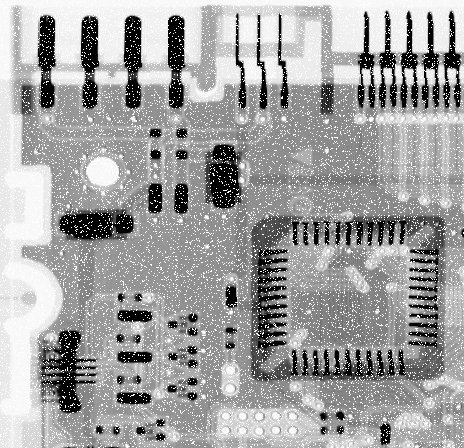

Filtered: 


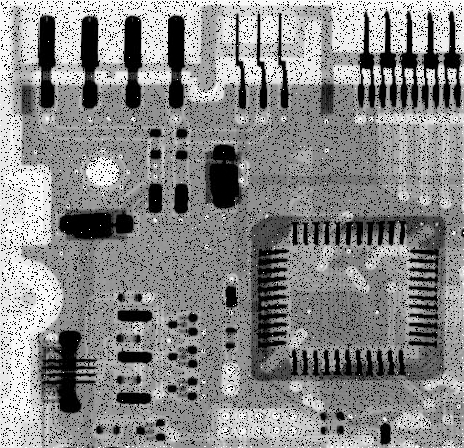

In [ ]:
img=np.copy(image1)
s=3
order = 1
ft2 = [1]*9

for i in range(image1.shape[0]):
  for j in range(image1.shape[1]):
      ft = con(i,j,image1.shape[0],image1.shape[1],s)
      # print(ft)
      ft = np.array(ft)
      sm=0
      for f in ft:
          sm += f
      mn=0
      if len(ft) !=0 and sm!=0:
        for r in range(order+1):
          ft2 *= ft
        for f in ft2:
          mn += f
        mn = mn/sm
        if(mn!=min and mn!=max and image1[i][j]==min or image1[i][j]==max) :
          img[i][j]=mn

print('Orginal: ')
cv2_imshow(image1)
print('Filtered: ')
cv2_imshow(np.asarray(img))
